In [13]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

In [14]:
shap_tfbs = ["AHL20", "AT3G46070", "TRP5", "RAMOSA1", "ERF069", "REF6", "DOF1.5", "CDF5", "ARF2", "CDF2", "DOF5.3", "DOF5.7", "ARR1", "DOF3.2", "ABI3", "ARF16", "MNB1A", "DREB1D", "NID1", "MYB24"]

### Load in the motifs 

In [15]:
LTR_motifs = pd.read_csv("/data/xhorvat9/LTR_classification_data/TFBS/LTR_test_motifCounts.csv", sep="\t").set_index("ID")
non_LTR_motifs = pd.read_csv("/data/xhorvat9/LTR_classification_data/TFBS/non_LTR_test_motifCounts.csv", sep="\t").set_index("ID")

y = [1] * len(LTR_motifs) + [0] * len(non_LTR_motifs)

X_motifs = pd.concat([LTR_motifs, non_LTR_motifs])

/tmp/ipykernel_1819983/1551987092.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  non_LTR_motifs = pd.read_csv("/data/xhorvat9/LTR_classification_data/TFBS/non_LTR_test_motifCounts.csv", sep="\t").set_index("ID")


In [16]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X_motifs).toarray()

# score = clf.score(X, y)

### Load the trained GBC classifier 

In [ ]:
#GBC = 

In [5]:
import tqdm
tfbs_performance = {}
GBC = pickle.load(open("GBC_model_FULL.pkl", "rb"))
for tfbs in tqdm.tqdm(shap_tfbs):



    # Turn feature of interest to 0
    X_modified = X_motifs.copy()
    X_modified[[tfbs]] = 0

    # Scale using TF-IDF
    tfidf = TfidfTransformer()
    X = tfidf.fit_transform(X_modified).toarray()

    # Run the classifier
    modified_score = GBC.score(X, y)

    tfbs_performance[tfbs] = modified_score

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [02:06<00:00,  6.30s/it]


In [6]:
tfbs_performance

{'AHL20': 0.7645143035328629,
 'AT3G46070': 0.781191171884925,
 'TRP5': 0.775890145171908,
 'RAMOSA1': 0.7802210493492094,
 'ERF069': 0.780683012461455,
 'REF6': 0.7798283807038008,
 'DOF1.5': 0.7795281046808412,
 'CDF5': 0.7800824604155359,
 'ARF2': 0.7809717394066084,
 'CDF2': 0.7824615704436001,
 'DOF5.3': 0.7767101296961437,
 'DOF5.7': 0.7805790707611997,
 'ARR1': 0.7804058345941076,
 'DOF3.2': 0.781861018397681,
 'ABI3': 0.7790430434129835,
 'ARF16': 0.7812489172739556,
 'MNB1A': 0.7813066626629863,
 'DREB1D': 0.7801286567267604,
 'NID1': 0.7818148220864564,
 'MYB24': 0.78093709217319}

In [23]:
import tqdm
import random

all_perfos = {}
GBC = pickle.load(open("GBC_model_FULL.pkl", "rb"))
for i in range(5):
    randomized_performance = {}
    for tfbs in tqdm.tqdm(shap_tfbs):

        # Turn feature of interest to 0
        X_modified = X_motifs.copy()
        mx = max(X_modified[[tfbs]].values)[0]
        X_modified[tfbs] = [random.randint(0, mx) for _ in range(len(X_modified[[tfbs]]))]

        # Scale using TF-IDF
        tfidf = TfidfTransformer()
        X = tfidf.fit_transform(X_modified).toarray()

        # Run the classifier
        modified_score = GBC.score(X, y)

        randomized_performance[tfbs] = modified_score
    all_perfos[i] = randomized_performance

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [01:58<00:00,  5.92s/it]


In [24]:
dt = pd.DataFrame(all_perfos)
for i in range(5):
    dt[i] -= 0.78093709217319
    dt[i] *= -100

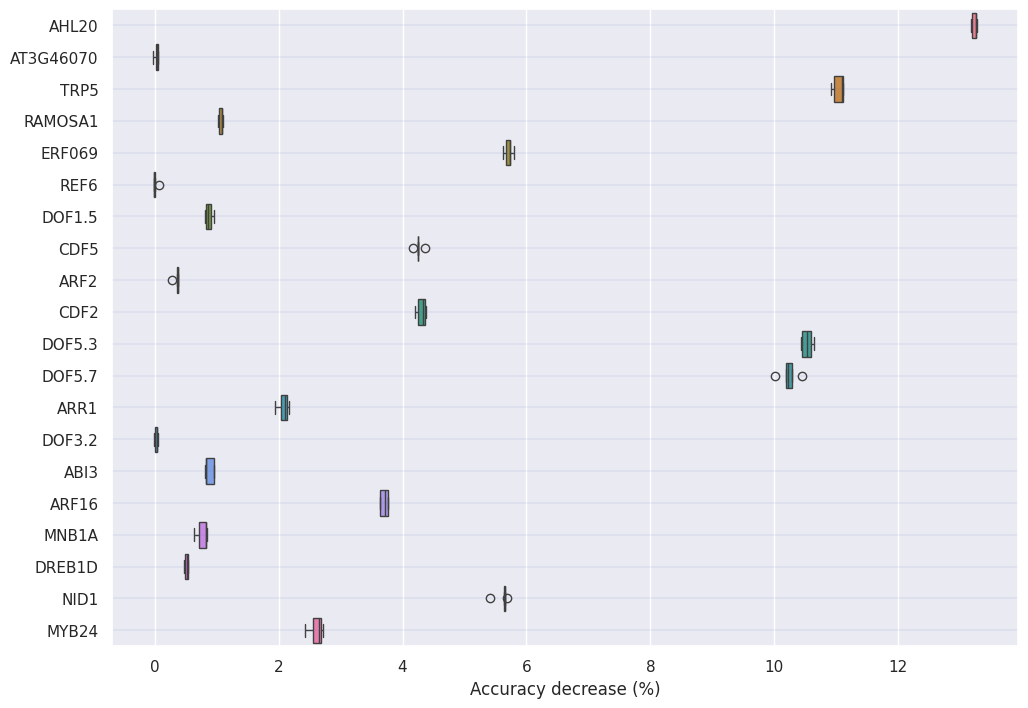

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(data=dt.T, orient="h")
g.set_xlabel("Accuracy decrease (%)")
for x in shap_tfbs:
    plt.axhline(y=x, lw=0.1) 

## Do the same for insignificant features

In [11]:
import seaborn as sns
dct = {"POPTR_0002s00440g ": 0.663,
"DOF5.8":  3.306,
"TREE1":  5.109,
"BEE2 ": 1.711,
"AT5G04390 ": 0.527,
"AHL20":  5.753,
"P0510F09.23 ": 0.759,
"DOF5.3 ": 7.772,
"AT5G05790 ": 0.841,
"ARF39 ": 0.079,
"AT3G46070 ": 1.878,
"ARF16 ": 2.807,
"AT1G14600 ": 3.475,
"DOF5.7 ": 5.562,
"GT-2 ": 0.606,
"TSAR2 ": 1.323,
"Zm00001d035604 ": 0.652,
"ERF069 ": 3.729,
"GRF4 ": 1.723,
"SIZF2 ": 0.489}


In [12]:
seaborn.barplot

ValueError: If using all scalar values, you must pass an index

SyntaxError: invalid syntax (3711904309.py, line 1)